In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('pima.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\riyaj\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [6]:
from matplotlib import rcParams
import warnings

In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
496,5,110,68,0,0,26.0,0.292,30,0
249,1,111,86,19,0,30.1,0.143,23,0
305,2,120,76,37,105,39.7,0.215,29,0
75,1,0,48,20,0,24.7,0.140,22,0
242,3,139,54,0,0,25.6,0.402,22,1


In [9]:
x = data.drop("Outcome",axis=1)
y = data["Outcome"]

In [10]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [11]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.1, random_state=42)

In [15]:
classifier = RandomForestClassifier(n_estimators=100)

In [16]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
print("Accuracy score: ",accuracy_score(y_test,y_pred))

Accuracy score:  0.8051948051948052


In [19]:
feature_importances_df = pd.DataFrame({"feature":list(x.columns),"importance":classifier.feature_importances_}).sort_values("importance",ascending=False)

In [20]:
feature_importances_df

,feature,importance
1,Glucose,0.259124
5,BMI,0.154794
7,Age,0.132095
6,DiabetesPedigreeFunction,0.128551
2,BloodPressure,0.086498
0,Pregnancies,0.084994
4,Insulin,0.077156
3,SkinThickness,0.076789


In [21]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [23]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
y_pred = clf.predict(X_test)

In [25]:
print("Accuracy- Decision Tree: ",accuracy_score(y_test, y_pred))

Accuracy- Decision Tree:  0.7402597402597403


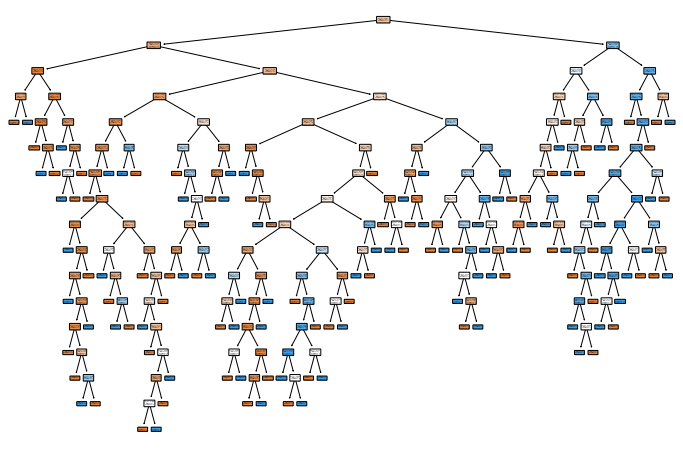

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(clf,filled=True,rounded=True)
plt.show()